In [1]:
import os 
# Go one folder back
os.chdir('..')
import numpy as np
import matplotlib.pyplot as plt
import glob

In [3]:
# Get all the file paths that start with "samples"
sampel_files = glob.glob("MCMC_tests/trace_v1*.npz")

def sort_files(file_list):
    return sorted(file_list, key=lambda x: int(x.split('trace_v1_')[-1].split('.')[0]))

sorted_files = sort_files(sampel_files)

# Load the files
sampel_data = [np.load(file) for file in sorted_files]
len_sampel_data = len(sampel_data)


In [4]:
a = 'arr_0'
print(f'Result shape for each person is ({len(sampel_data[0][a])}, {len(sampel_data[0][a][0])})')

Result shape for each person is (4, 4000)


In [5]:
result_flattened = [sampel_data[person][a].flatten() for person in range(len_sampel_data)]
result_flattened
print(f'Result shape for each person is now (1, {len(result_flattened[0])})')

Result shape for each person is now (1, 16000)


In [6]:
result_counted = [[np.count_nonzero(result_flattened[i] == j) for j in range(6)] for i in range(len_sampel_data)]

# check for each person if there are 16000 samples
for person in result_counted:
    if (sum(person) != len(result_flattened[0])):
        print(f'error')

# Plot

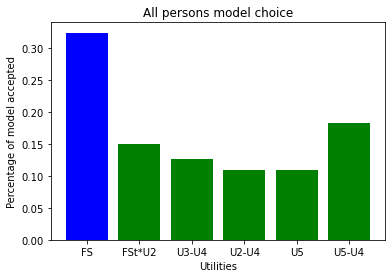

In [7]:
result_counted_sum = [sum(i) for i in zip(*result_counted)]
result_counted_sum_percentage = [result_counted_sum[i]/sum(result_counted_sum) for i in range(len(result_counted_sum))]

us = ['FS', 'FSt*U2', 'U3-U4', 'U2-U4', 'U5', 'U5-U4']
counts = result_counted_sum_percentage
# Plot the bar chart
plt.bar(us, counts, color = ['blue', 'green', 'green', 'green', 'green', 'green'])
# Set the title and axis labels
plt.title('All persons model choice')
plt.xlabel('Utilities')
plt.ylabel('Percentage of model accepted')
# Display the plot
plt.show()

In [8]:
# compute bayes factors
result_counted_sum_percentage

[0.32357224025974024,
 0.15043912337662338,
 0.1261801948051948,
 0.10918506493506494,
 0.10851785714285714,
 0.18210551948051948]

In [11]:
y_train = np.zeros(len(result_counted))
for person in range(len(result_counted)):
    counts = result_counted[person]
    y_train[person] = np.argmax(counts)

np.save('Results/y_train_v1.npy', y_train)

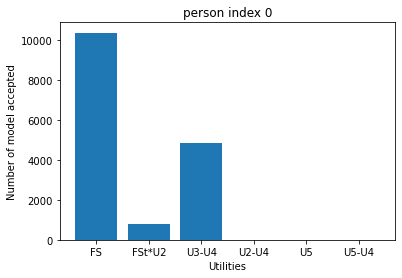

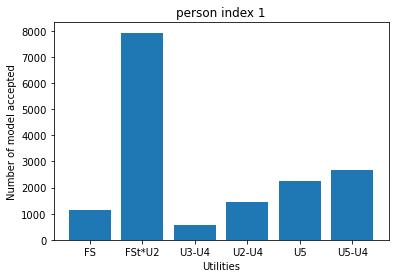

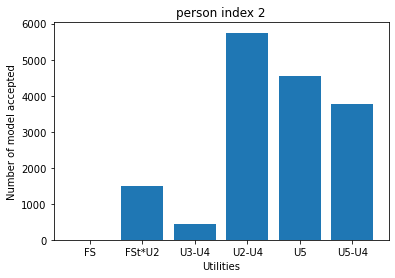

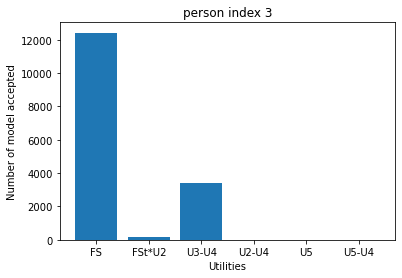

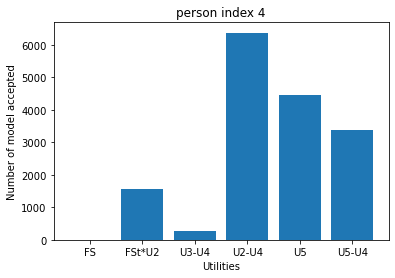

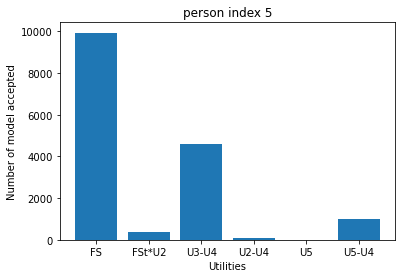

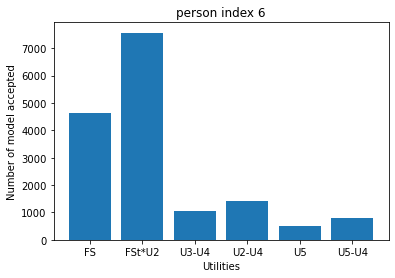

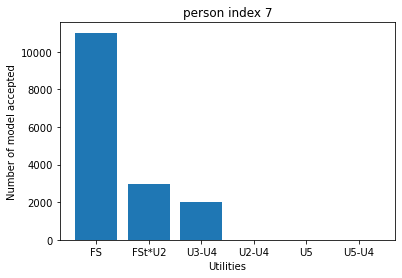

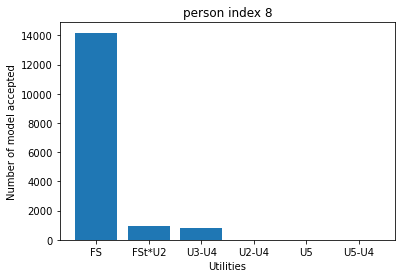

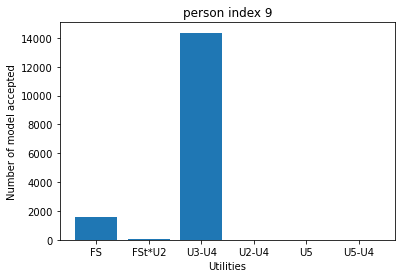

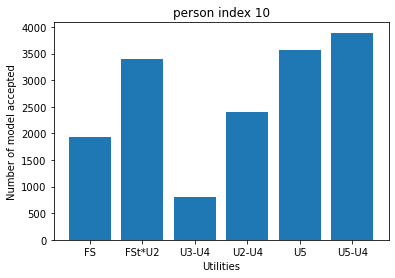

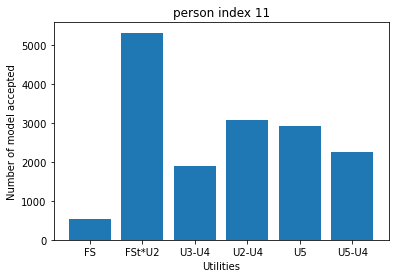

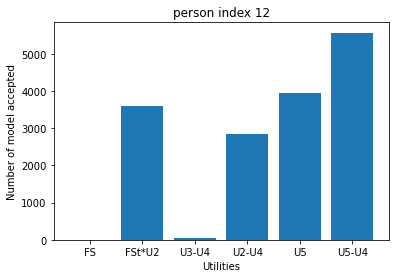

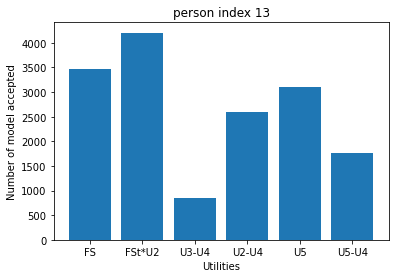

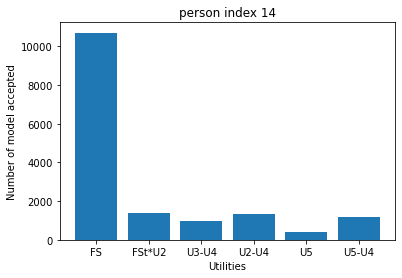

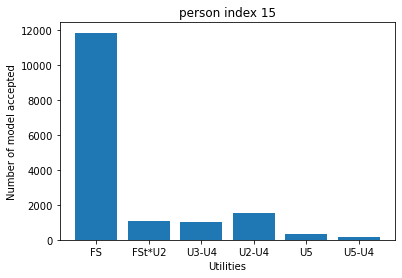

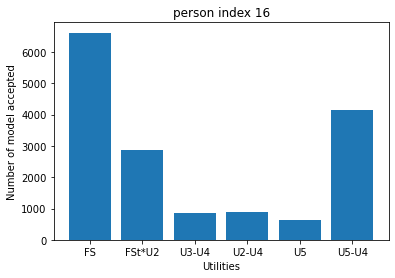

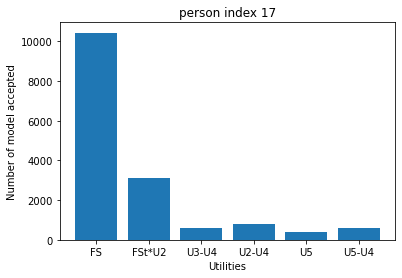

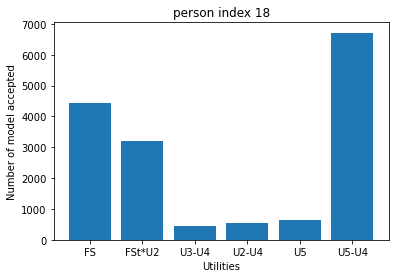

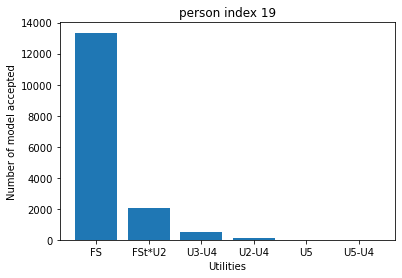

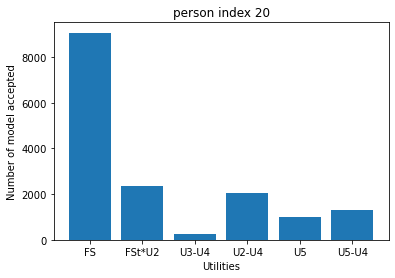

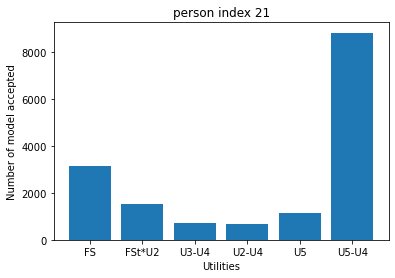

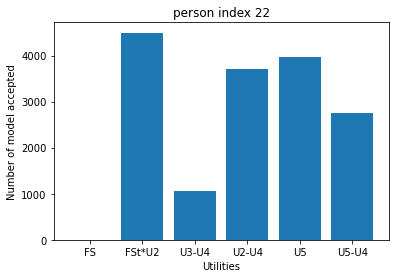

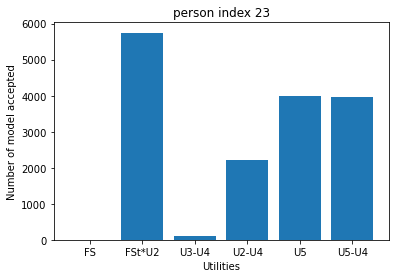

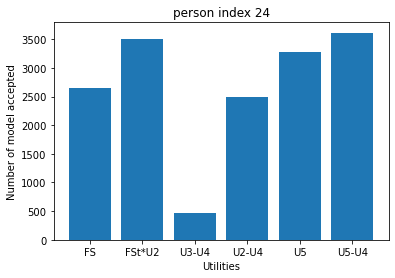

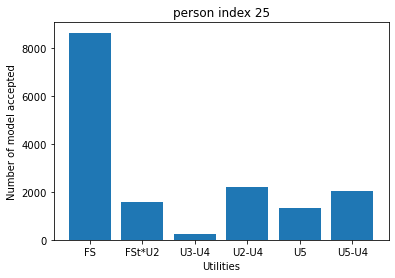

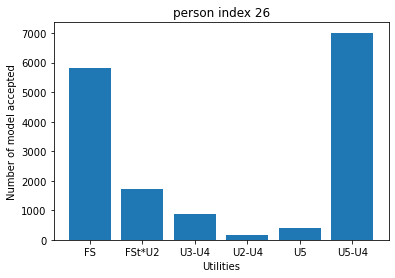

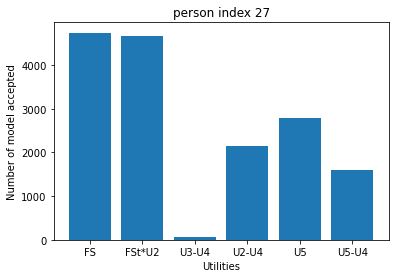

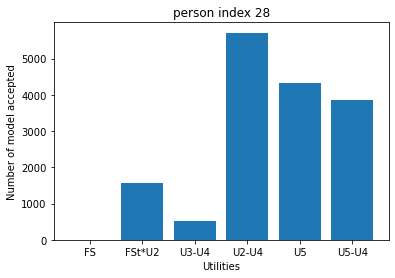

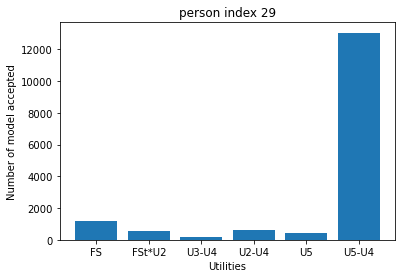

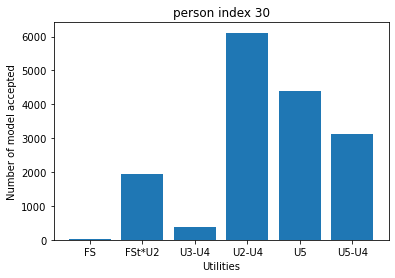

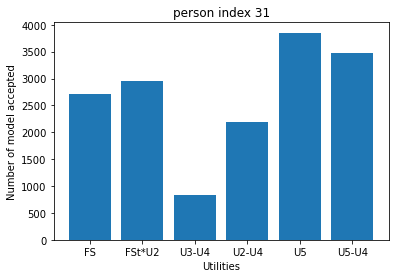

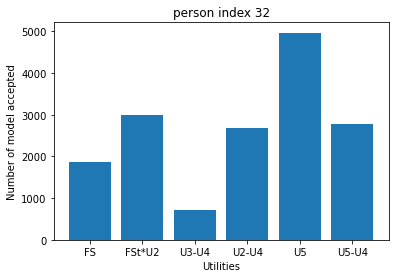

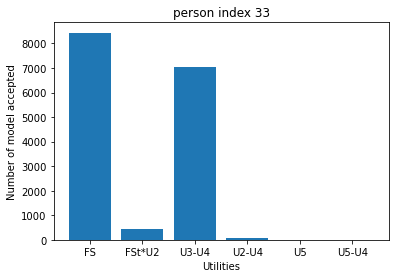

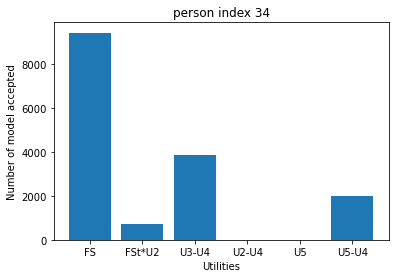

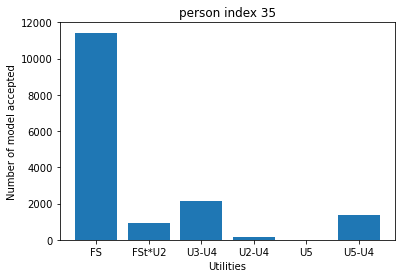

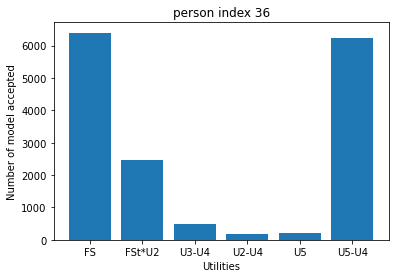

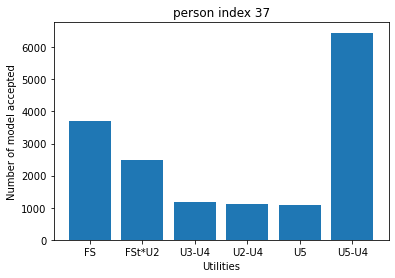

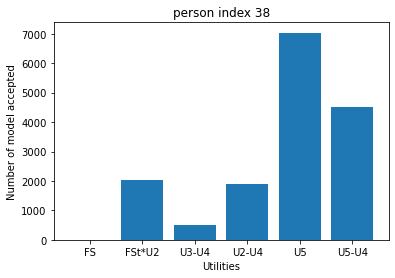

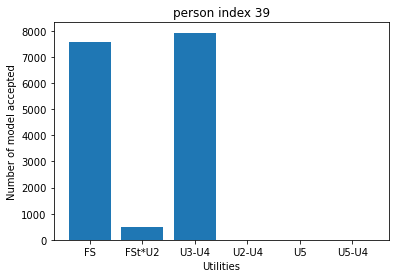

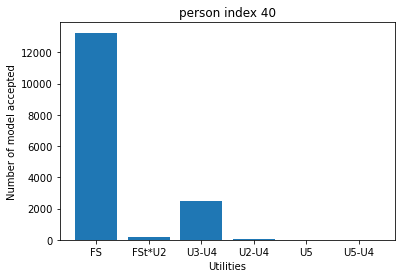

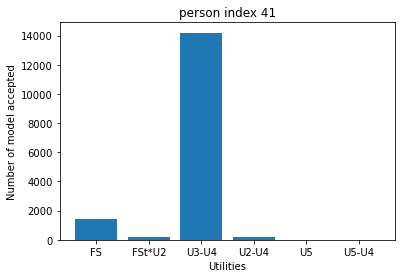

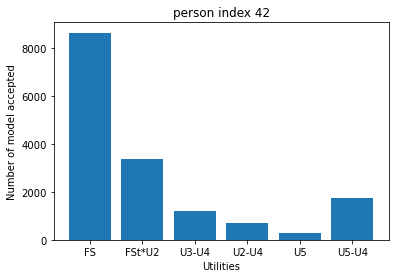

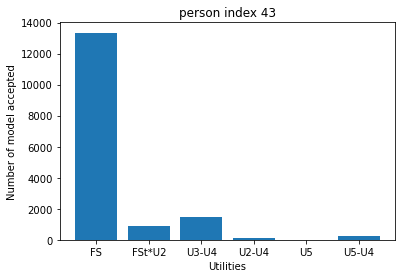

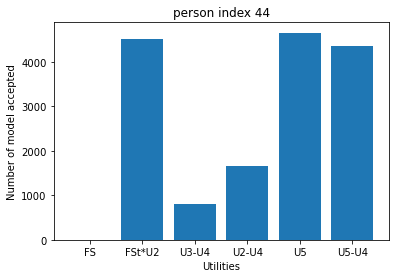

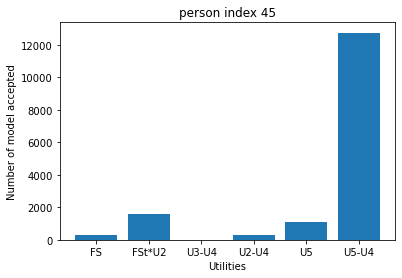

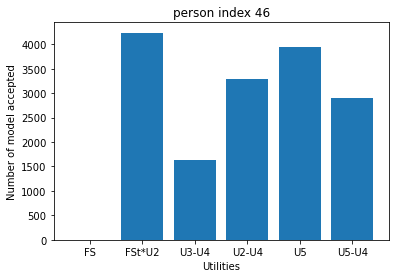

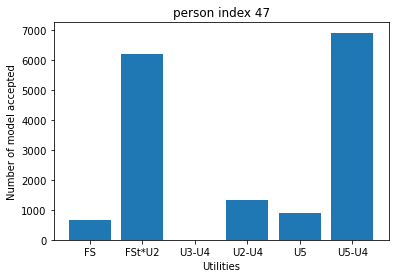

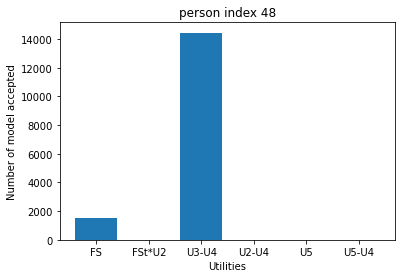

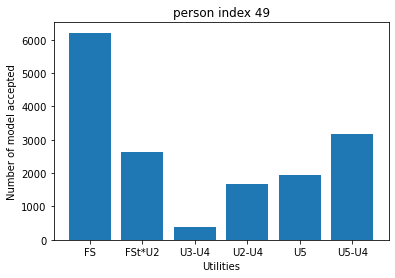

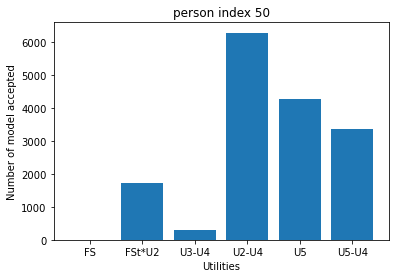

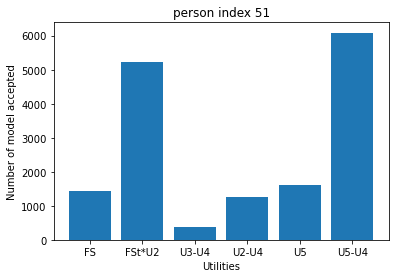

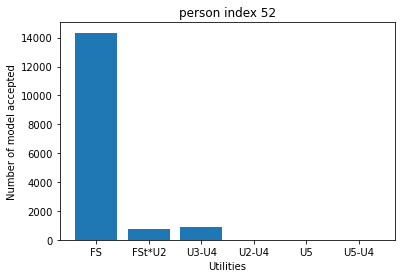

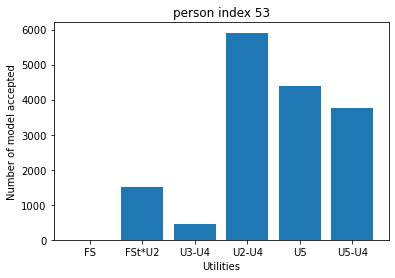

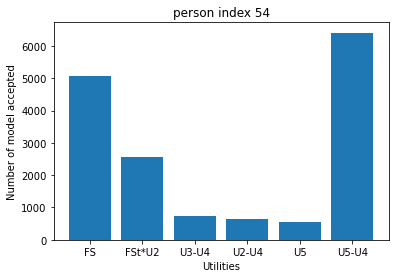

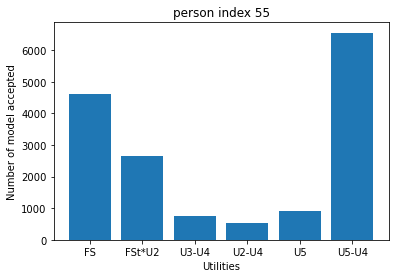

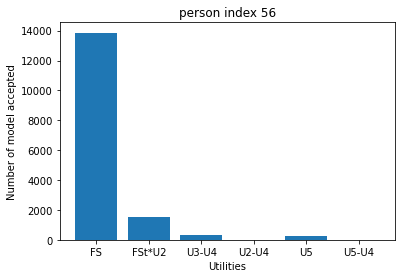

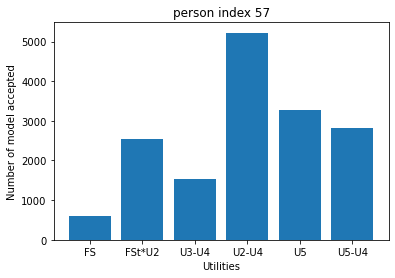

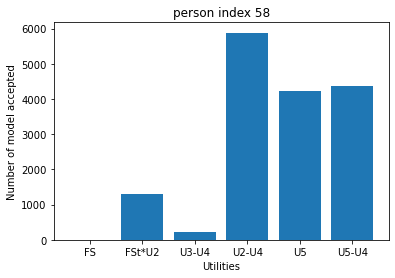

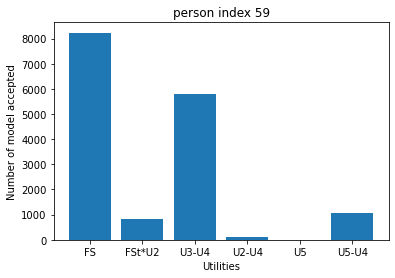

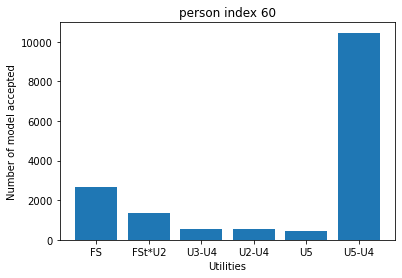

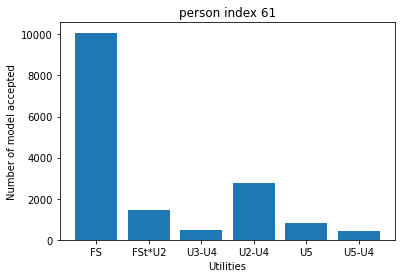

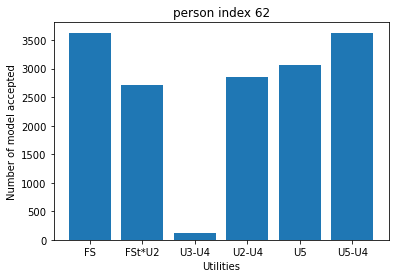

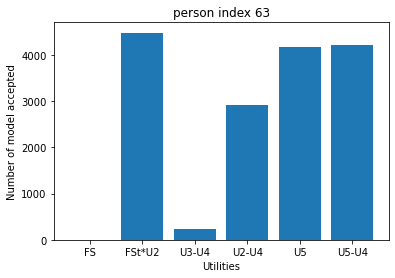

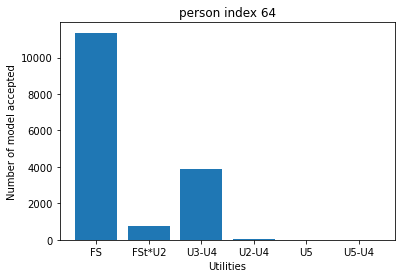

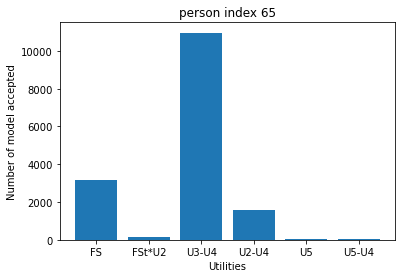

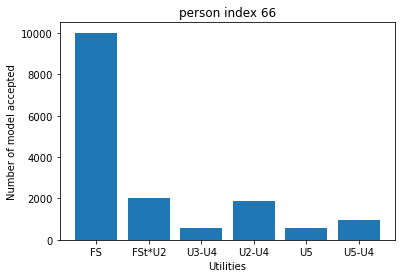

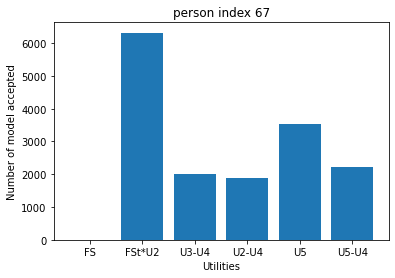

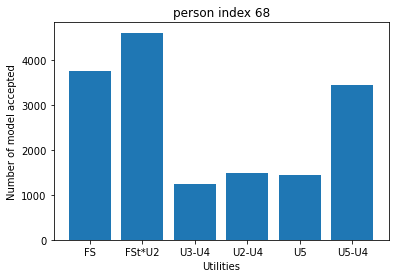

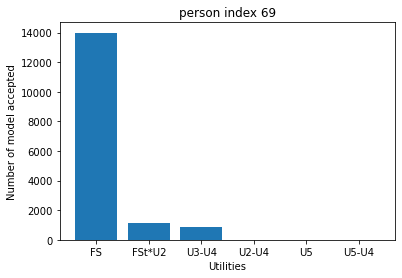

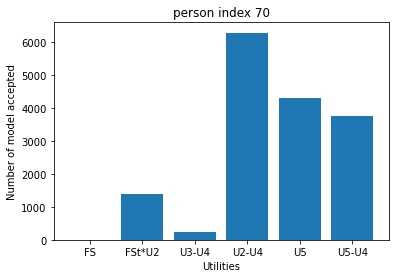

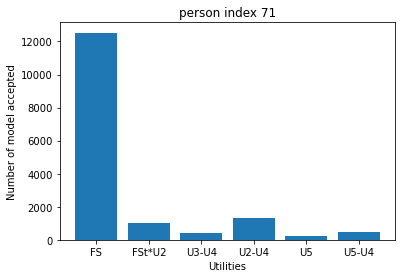

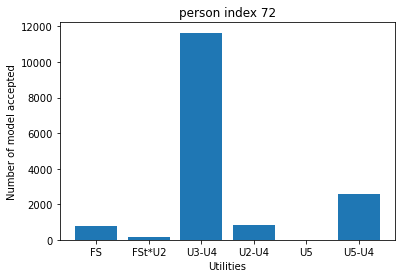

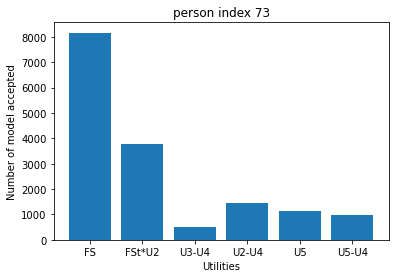

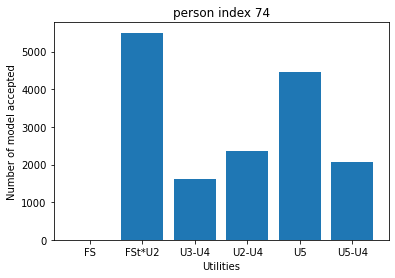

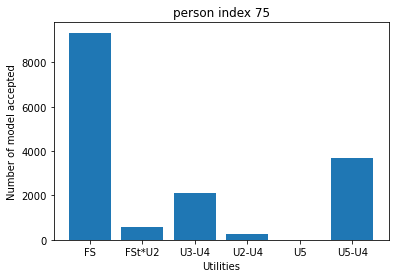

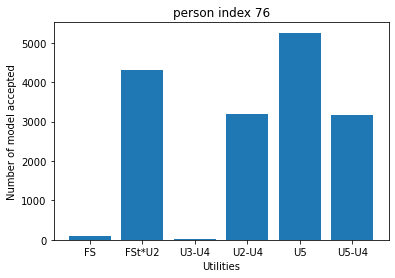

In [ ]:
for person in range(len(result_counted)):
    us = ['FS', 'FSt*U2', 'U3-U4', 'U2-U4', 'U5', 'U5-U4']
    counts = result_counted[person]

    # Plot the bar chart
    plt.bar(us, counts)

    # Set the title and axis labels
    plt.title(f'person index {person}')
    plt.xlabel('Utilities')
    plt.ylabel('Number of model accepted')

    # Display the plot
    plt.show()
